In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

/var/folders/v5/z5m5cyxj7pq0zpyhxs1mg4jh0000gn/T/ipykernel_28722/1958805592.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Visualizing the data in a scatter plot

Text(0, 0.5, 'Income($)')

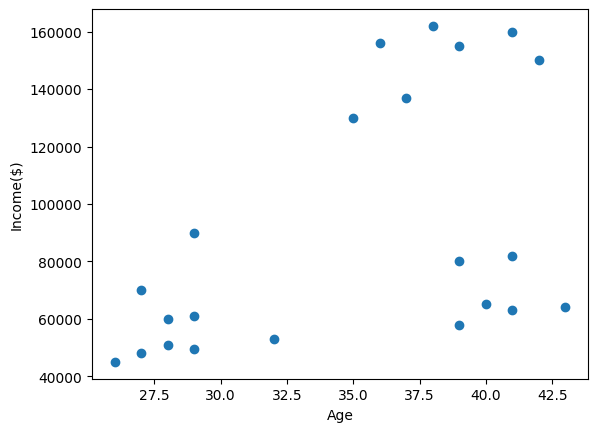

In [4]:
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

As we can see that there are 3 groups so we can set the value of `k` to 3 (**`n_clusters`**). In other cases when the visualization is not easy then we can use a loop and in each loop we can increase the value of `k` and calculate `SSE`.

Training the model with `k=3`

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)

# Classifying into 3 clusters
cluster = model.fit_predict(data[['Age','Income($)']])
cluster

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
# Adding the cluster into the dataset
data['cluster'] = cluster
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


We can also see the centroids of the cluster using `cluster_centers_`

In [10]:
model.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

We can create 3 dummy data frames and plot these in a graph along with the centroid

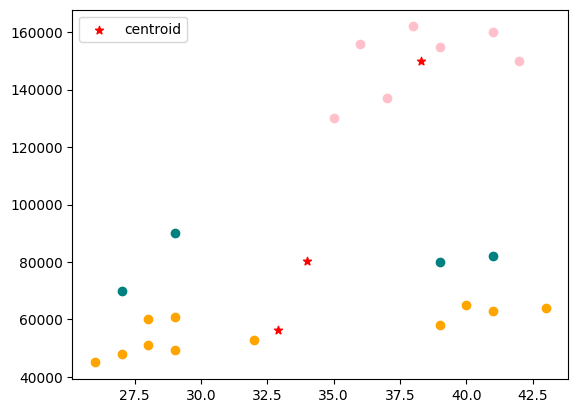

In [12]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='orange')
plt.scatter(df2.Age,df2['Income($)'],color='pink')
plt.scatter(df3.Age,df3['Income($)'],color='teal')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red', marker='*', label='centroid')
plt.legend()

As we can see, there are some deviations because the scaling between the x-axis and y-axis is not aligned. We can use `MinMaxScaler` from sklearn to normalize the range. It will change the range between (0 to 1).

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Creating an object
scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

We can train the model and then visualize it again

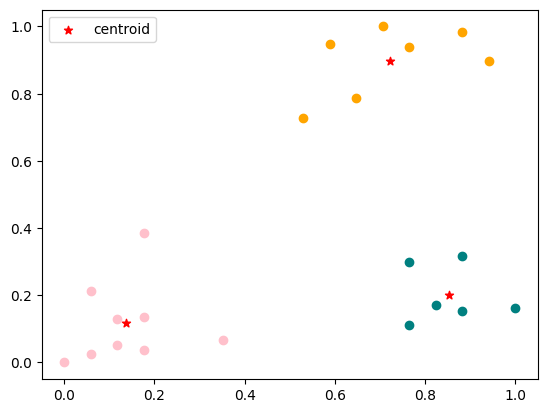

In [15]:
model = KMeans(n_clusters = 3)

# Classifying into 3 clusters
cluster = model.fit_predict(data[['Age','Income($)']])

# Adding the cluster into the dataset
data['cluster'] = cluster

df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='orange')
plt.scatter(df2.Age,df2['Income($)'],color='pink')
plt.scatter(df3.Age,df3['Income($)'],color='teal')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red', marker='*', label='centroid')
plt.legend()

We can also use the **Elbow Plot** to get the optimal value of `k`

In [19]:
# Calculating the sum of square error and appending to a list
sse = []
k_values = range(1,10)
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)
    """
    inertia_ is a measure of how well the data points fit into the clusters, specifically it is the sum of squared distances from each point to its assigned cluster center (centroid). Lower values indicate better clustering.
    """

Plotting the elobw plot

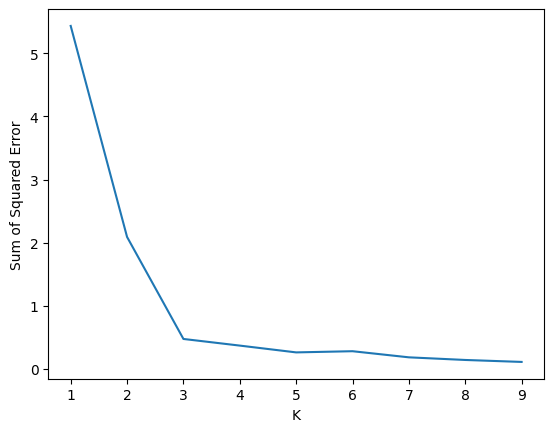

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_values,sse)

Here we can see the elbow at `k=3`